In [127]:
import os
import sys
import numpy as np
import pandas as pd
import math
#sys.path.insert(0, os.path.abspath('../data/h5/d2021219/'))
import h5py

In [128]:

filename = "../data/h5/d2021219/D2021219000.hdf5"
filename = '../data/ESF2021218/d2021219/D2021219000.hdf5'
filename = "../data/D2021321000.hdf5"
#filename = "../data/D2021322000.hdf5"

f = h5py.File(filename, "r")
# List all groups
print("Keys: %s" % f.keys())
a_group_key = list(f.keys())[0]
    
# Get the data
data = f['Data']
meta = f['Metadata']

Keys: <KeysViewHDF5 ['Data', 'Metadata']>


In [129]:
data.keys()

<KeysViewHDF5 ['data_snr', 'utctime']>

In [130]:
meta.keys()

<KeysViewHDF5 ['azimuthList', 'channelList', 'codeList', 'elevationList', 'heightList', 'ippSeconds', 'nCohInt', 'nFFTPoints', 'nIncohInt', 'nProfiles', 'timeZone', 'type']>

In [131]:
#list(meta['heightList'])

In [132]:
#data['utctime']

In [133]:
snr = data['data_snr']
snr.keys()

<KeysViewHDF5 ['channel00', 'channel01', 'channel02', 'channel03', 'channel04', 'channel05', 'channel06', 'channel07', 'channel08', 'channel09']>

In [134]:
ch0 = snr['channel00']
ch0

<HDF5 dataset "channel00": shape (1000, 600), type "<f8">

In [135]:

def get_matrix_and_pos(num_channels,withd_channels, n_heights):
    w = (num_channels * withd_channels)+num_channels 
    n_heights
    list_index = []
    for i in range(num_channels):
        a = (withd_channels*(i)+i)
        b = int(math.floor((w/num_channels)*(i+1)))-1
        c = int(math.floor(((w/2 - (num_channels/2))+i)))
        list_index.append([a,b,c])
    #print(list_index)
    m = np.empty((n_heights,w))
    m[:] = np.nan
    return m, list_index

In [136]:
n_ch = 3
w_ch = 3
n_h = 25

In [137]:
plot_matrix , pos_list = get_matrix_and_pos(n_ch,w_ch,n_h)
pos_list

[[0, 3, 4], [4, 7, 5], [8, 11, 6]]

In [138]:
plot_matrix

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, n

In [139]:
def get_lines(p_list,h):
    p1 = (0, p_list[0])
    p2 = (0, p_list[1])
    p3 = (h-1,p_list[2])
    l1=[]
    l2=[]
    poly1 = np.polyfit([p1[0],p3[0]], [p1[1],p3[1]], deg=1)
    poly2 = np.polyfit([p2[0],p3[0]], [p2[1],p3[1]], deg=1)
    for n in range(h):
        l1.append([n, round(np.polyval(poly1,n))])
        l2.append([n, round(np.polyval(poly2,n))])
    #print(l1)
    #print(l2)
    return l1, l2

In [140]:
def fill_matrix_test(m, pos_list):
    matrix = m
    heights = len(matrix[:,0])
    i = 0
    for pl in pos_list:
        i += 1
        la, lb = get_lines(pl,heights)
        for n,m in la:
            matrix[n,m] = i
        i += 1
        for n,m in lb:
            matrix[n,m] = i
    return matrix

In [141]:
#fill_matrix_test(plot_matrix,pos_list)

In [142]:
a = [[n+1,(n+1)*10] for n in range (0,n_h)]
a = [[1,2,3,4] for n in range (0,n_h)]
#a = [[n+1,(n+1)*10,(n+1)] for n in range (0,n_h)]
dat = np.array(a)
dat = dat.T
dat

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4]])

In [143]:
def get_distance(x,y,x_0,y_0):
    #print(x,y,x_0,y_0)
    c = math.hypot(x - x_0, y - y_0)
    #print(c, x, y)
    return int(c)

In [144]:
def fill_matrix(zero_matrix, pos_list, data):
    matrix = zero_matrix
    heights = len(matrix[:,0])
    w = len(matrix[0])
    #print(pos_list)
    i = 0
    for pl in pos_list:

        la, lb = get_lines(pl,heights)
        
        for hei in range(heights): #desde primera altura
            for x in range(la[hei][1],(lb[hei][1]+1),1):
                point_range = get_distance(x,(heights-hei)-1, pl[2], 0 ) #distancia al origen del beam
                
                if  point_range < (heights):
                    matrix[hei,x] = data[i,( point_range)]
                    #print(" h:{}, x:{}, d:{} a:{}, b:{}".format(heights-hei-1,x,point_range,0,pl[2]))
                    #print("fill")
                else:
                    pass
        i += 1
        
    return   matrix #np.flipud(matrix)

In [145]:
fill_matrix(plot_matrix,pos_list,dat)

array([[ 1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  3.,  3.,  3., nan],
       [nan,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  3.,  3.,  3., nan],
       [nan,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  3.,  3.,  3., nan],
       [nan,  1.,  1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  3., nan],
       [nan,  1.,  1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  3., nan],
       [nan,  1.,  1.,  1.,  2.,  2.,  2.,  3.,  3.,  3., nan, nan],
       [nan,  1.,  1.,  1.,  2.,  2.,  2.,  3.,  3.,  3., nan, nan],
       [nan, nan,  1.,  1.,  2.,  2.,  2.,  3.,  3.,  3., nan, nan],
       [nan, nan,  1.,  1.,  2.,  2.,  2.,  3.,  3.,  3., nan, nan],
       [nan, nan,  1.,  1.,  2.,  2.,  2.,  3.,  3., nan, nan, nan],
       [nan, nan,  1.,  1.,  1.,  2.,  2.,  3.,  3., nan, nan, nan],
       [nan, nan,  1.,  1.,  1.,  

# REAL DATA TEST

In [146]:
n_ch = len(list(snr.keys()))
w_ch = 50
n_h = len(snr['channel00'][0,:])
blocks= len(snr['channel00'][:,0])
print("Blocks: ", blocks,snr['channel00'][0,:].shape)

Blocks:  1000 (600,)


In [147]:
channels = list(snr.keys())
n_channels = len(channels)
channels

['channel00',
 'channel01',
 'channel02',
 'channel03',
 'channel04',
 'channel05',
 'channel06',
 'channel07',
 'channel08',
 'channel09']

In [148]:
plot_matrix_amisr , pos_list_amisr = get_matrix_and_pos(n_ch,w_ch,n_h)

In [149]:
import matplotlib.pyplot as plt
from matplotlib import patches
import time
from matplotlib.colors import LogNorm
from IPython import display


In [150]:
import datetime
TIME_FORMAT='%Y-%m-%d %H:%M:%S'
times = data['utctime']
#print(list(times))
dates =[datetime.datetime.utcfromtimestamp(utc_time) for utc_time in  list(data['utctime'])]
str_dates_local = [(date-datetime.timedelta(hours=5)).strftime(TIME_FORMAT)  for date in dates]


In [151]:
x = np.array(list(meta['heightList']))  # alturas
max_alt = np.amax(x)
total_alt = x[-1]-x[0] #todo el rango incluyendo la altura "negativa"
azi = list(meta['azimuthList'])
znth = [90-e for e in meta['elevationList']]
sgn = np.sign(azi)
znth *= sgn
#print(sgn)
elev = list(meta['elevationList'])
elev *= sgn
print(elev)

def poyect_range(zenith, max_alt):
    if zenith == 0:
        zenith = 0.00000001
    if zenith == 90:
        zenith = 89.999999
    if zenith == -90:
        zenith = -89.999999
    dist = max_alt* math.tan(math.radians(zenith))
    return dist

min_d = poyect_range(znth[0],max_alt)
max_d = poyect_range(znth[-1],max_alt)

steps = w_ch*n_ch + n_ch
total_beam = (abs(max_d) + abs(min_d))/2


angles = np.linspace(znth[0],znth[-1],steps)
#print(angles)

list_range = np.asarray([poyect_range(ang,max_alt) for ang in angles])
print(list_range.shape, x.shape, steps, min_d, max_d)
y = list_range
#print(list_range)
#aux = [n[i+1]-n[i] for i in range(len(
#beam_res = 5 # 5 grados

[-59.46 -65.83 -73.85 -80.27 -86.63  85.08  80.38  74.    66.    61.19]
(510,) (600,) 510 -498.17542715389607 464.3967878736497


In [152]:
maxdB = 20
mindB = 0
points_cb = 500 #puntos de la barra de colores

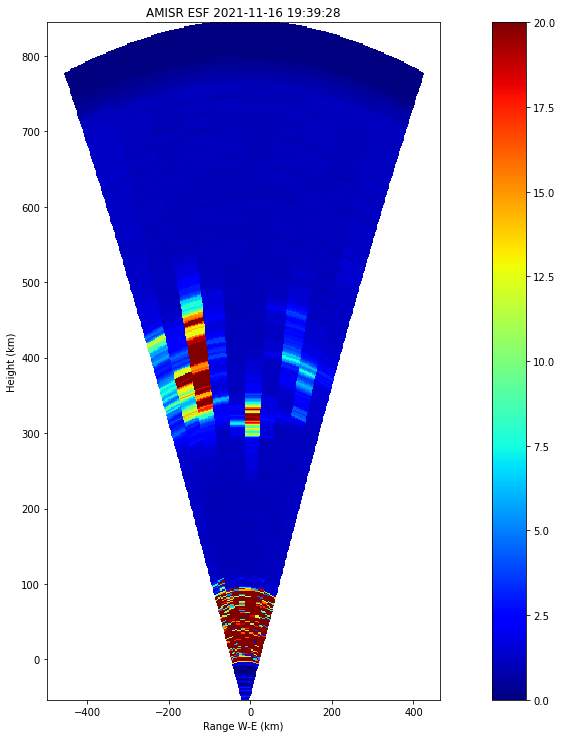

61.19 120.65 59.349999999999994


/home/soporte/.local/lib/python3.6/site-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


KeyboardInterrupt: 

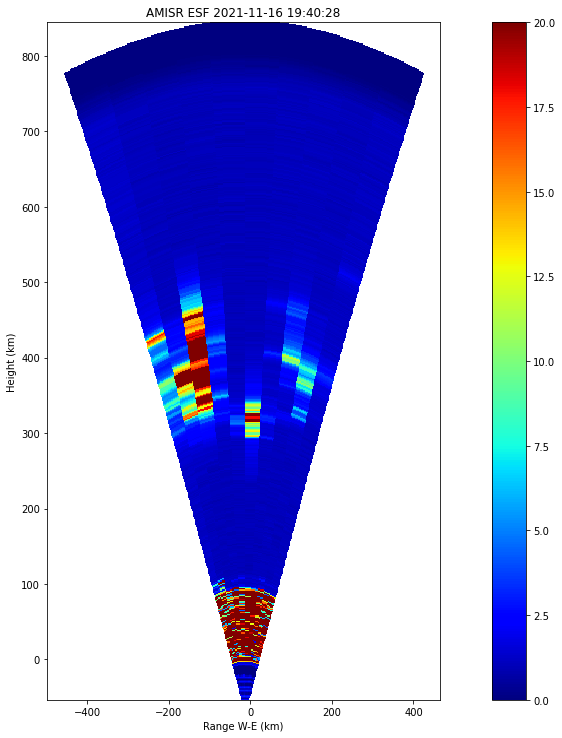

In [153]:
from scipy.interpolate import interp2d
from scipy.ndimage.filters import gaussian_filter
from scipy.ndimage.filters import median_filter


#data_ch = snr['ch']
#['channel00', 'channel01']
plt.ion()
fig, ax = plt.subplots()
fig.set_size_inches(8, 10)
#fig.show()
hdisplay = display.display("", display_id=True)

#circle = plt.Circle((x[0], 0), 200, color='b', fill=False)
theta1 =  elev[-1]
theta2 =  abs(elev[0] - elev[-1])
angle = 180 - (abs(elev[-1]) + abs(elev[0]))
print(theta1, theta2, angle)
plt.tight_layout()
#matplotlib.patches.Arc(xy, width, height, angle=0.0, theta1=0.0, theta2=360.0, **kwargs)
#arc1 = patches.Arc((0,x[0]), 400, 500, angle=0.0, theta1=theta1, theta2=theta2, fill=False)
#arc1 = patches.Arc((0,x[0]), len(list_range), 1500, angle=0.0, theta1=15.0, theta2=165.0, linestyle='--')
mylevs_cbar = list(np.linspace(mindB,maxdB,points_cb)) #niveles de la barra de colores
X, Y = np.meshgrid(y, x)
n_fig=1
#print(z.shape,X.shape,Y.shape)
color_bar_flag = False
off = 0 #para adelantar
for block in range(blocks):
    ax.clear()
    dat_channels=[]
    for key in list(snr.keys()):
        dat_channels.append(snr[key][block+off,:].squeeze())
    _data = np.array(dat_channels)
    
    
    #print("block: ",block)
    my_plot = fill_matrix(plot_matrix_amisr, pos_list_amisr, _data)

    #z = np.flipud(my_plot)[:450,:]
    z = np.flipud(my_plot)
    
    #modes {‘reflect’, ‘constant’, ‘nearest’, ‘mirror’, ‘wrap’},
    #data = gaussian_filter(z, sigma=2, mode='nearest')
    #data = median_filter(z, size=20, mode='nearest')
    data=z
    
    #f = interp2d(y, x, z, fill_value=True, kind='quintic') # quintic linear
    #plot_data = f(y,x)
    #print(_data[:,300])
    
    #im = ax.pcolormesh(X,Y,z, cmap ='jet', vmin=mindB, vmax=maxdB, shading='nearest')
    im = ax.pcolormesh(X,Y,data, cmap ='jet', vmin=mindB, vmax=maxdB)#, shading='nearest')
    #im = ax.contourf(X,Y,z, cmap ='jet', vmin=mindB, vmax=maxdB, levels=mylevs_cbar, shading='nearest')
    #im = ax.pcolormesh(X,Y,plot_data, cmap ='jet', vmin = 0, vmax = 15)
    
    #im = ax.imshow(z, cmap='jet', vmin=0, vmax=15,
    #          extent=[x.min(), x.max(), y.min(), y.max()],interpolation='nearest', origin='lower')
      
    #ax.add_patch(circle)
    #ax.add_patch(arc1)
    ax.set_xlabel("Range W-E (km)")
    ax.set_ylabel("Height (km)")
    ax.set_title("AMISR ESF {}".format(str_dates_local[block+off]))
    
    #cax = fig.add_axes([0.27, 0.8, 0.5, 0.05]) 
    #fig.colorbar(im, cax=cax)
    if not color_bar_flag:
        #fig.colorbar(im, orientation="horizontal", pad=0.1)
        fig.colorbar(im, orientation="vertical", pad=0.1)
        color_bar_flag = True
    
    
    hdisplay.update(fig)
    
    fig.savefig('../out_figs/{}.png'.format(n_fig))
    n_fig +=1
    time.sleep(0.5)
    
